Load the dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/raw_analyst_ratings.csv")  
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Descriptive Statistics

#### Headline Lengths: Calculate the length of each headline.

In [16]:
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())



count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


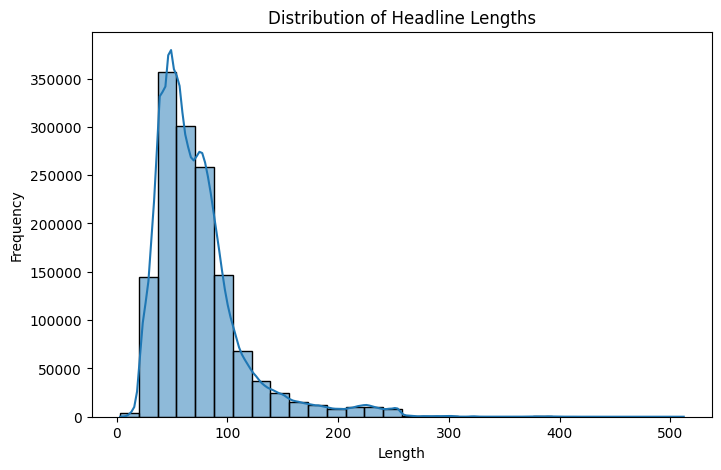

In [17]:
# Plot headline length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


#### Articles per Publisher: 

Count how many articles each publisher has.

<Axes: xlabel='publisher'>

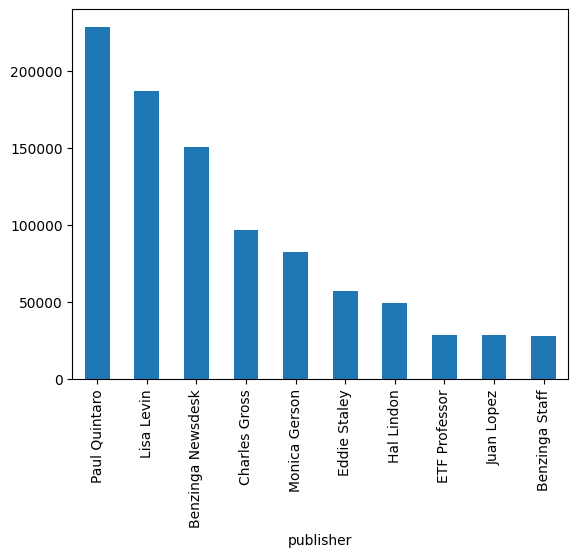

In [18]:
df['publisher'].value_counts().head(10).plot(kind='bar')

#### Publication Date Trends: 
Analyze date column. Convert to datetime objects.

In [19]:
print(df['date'].head()) # See the first few entries
print(df['date'].sample(5)) # See 5 random entries

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
674317           2019-10-18 00:00:00
222732     2020-03-23 10:34:27-04:00
1331359          2015-01-14 00:00:00
639648           2010-11-04 00:00:00
800671           2017-05-05 00:00:00
Name: date, dtype: object


## Text Analysis (Topic Modeling):
Using natural language processing to identify common keywords or phrases.

In [30]:
from textblob import TextBlob

df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,date_only,hour,domain
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,0.0,2020-06-05,10,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,0.0,2020-06-03,10,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,0.0,2020-05-26,4,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,0.0,2020-05-22,12,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,0.0,2020-05-22,11,NaN


In [22]:
# For keywords
from collections import Counter
import re

all_words = ' '.join(df['headline']).lower()
words = re.findall(r'\w+', all_words)
common = Counter(words).most_common(20)
print(common)

[('to', 404127), ('of', 270981), ('0', 255841), ('on', 245970), ('for', 239917), ('s', 239752), ('in', 223581), ('the', 213218), ('vs', 162099), ('stocks', 161776), ('est', 140604), ('eps', 128897), ('from', 120805), ('market', 120558), ('1', 119001), ('shares', 114313), ('and', 113924), ('reports', 108710), ('update', 91723), ('earnings', 87399)]


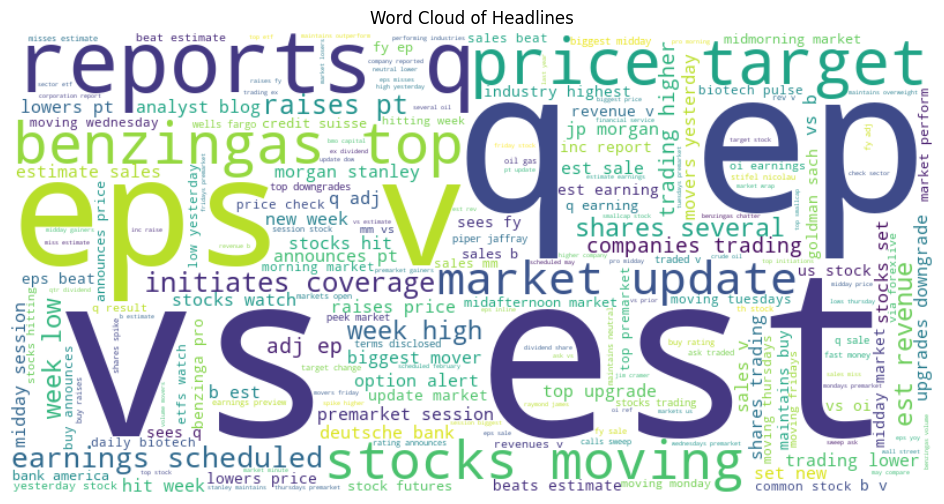

In [23]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))
headlines = ' '.join(df['headline'].dropna().astype(str).tolist()).lower()
headlines = re.sub(r'[^a-z\s]', '', headlines)
headlines = ' '.join([word for word in headlines.split() if word not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(headlines)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Headlines")
plt.show()

## Time Series Analysis:

Publication Frequency Variation: How does the publication frequency vary over time? Are there spikes related to specific market events? 

Publishing Times: Analyze publishing times to reveal if there's a specific time when most news is released.

#### 1. Data Preparation for Time Series Analysis
First, we need to ensure date column is properly formatted and set as the index, then create a time series of daily article counts. This is crucial for observing patterns over time.

In [24]:
# Run this line in your terminal or a Jupyter Notebook cell if statsmodels is not installed:
# !pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'date' column to datetime and handle unparseable entries
df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
df.dropna(subset=['date'], inplace=True) # Remove rows with invalid dates

# Create a copy for specific analyses that require 'date' as a regular column
df_for_hourly_analysis = df.copy()

print("Data collected and cleaned. First 5 rows:")
print(df.head())

/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_32701/200203270.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


Data collected and cleaned. First 5 rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  headline_length  sentiment  
0 2020-06-05 10:30:54-04:00     A 

#### 2: Prepare Visualization with Respect to Time vs. Key Feature
Prepare your data for time series analysis by counting daily articles and then visualize the observed pattern.

Prepare Daily Article Counts
Aggregate your news data to get a count of articles per day, creating your time series.

In [25]:
# Count headlines per day by grouping on the 'date' column
daily_headlines = df.groupby('date').size()

# Create a DataFrame for time series analysis
# The index of daily_headlines is already datetime, which is suitable for direct use.
time_series_data = pd.DataFrame({'Headlines_Count': daily_headlines.values}, index=daily_headlines.index)

# Ensure all dates in the range are present, filling missing with 0 for continuity.
idx = pd.date_range(time_series_data.index.min(), time_series_data.index.max(), freq='D')
time_series_data = time_series_data.reindex(idx, fill_value=0)

print("DataFrame 'time_series_data' created and prepared. First 5 rows:")
print(time_series_data.head())

DataFrame 'time_series_data' created and prepared. First 5 rows:
                           Headlines_Count
2011-04-27 21:01:48-04:00                1
2011-04-28 21:01:48-04:00                0
2011-04-29 21:01:48-04:00                0
2011-04-30 21:01:48-04:00                0
2011-05-01 21:01:48-04:00                0


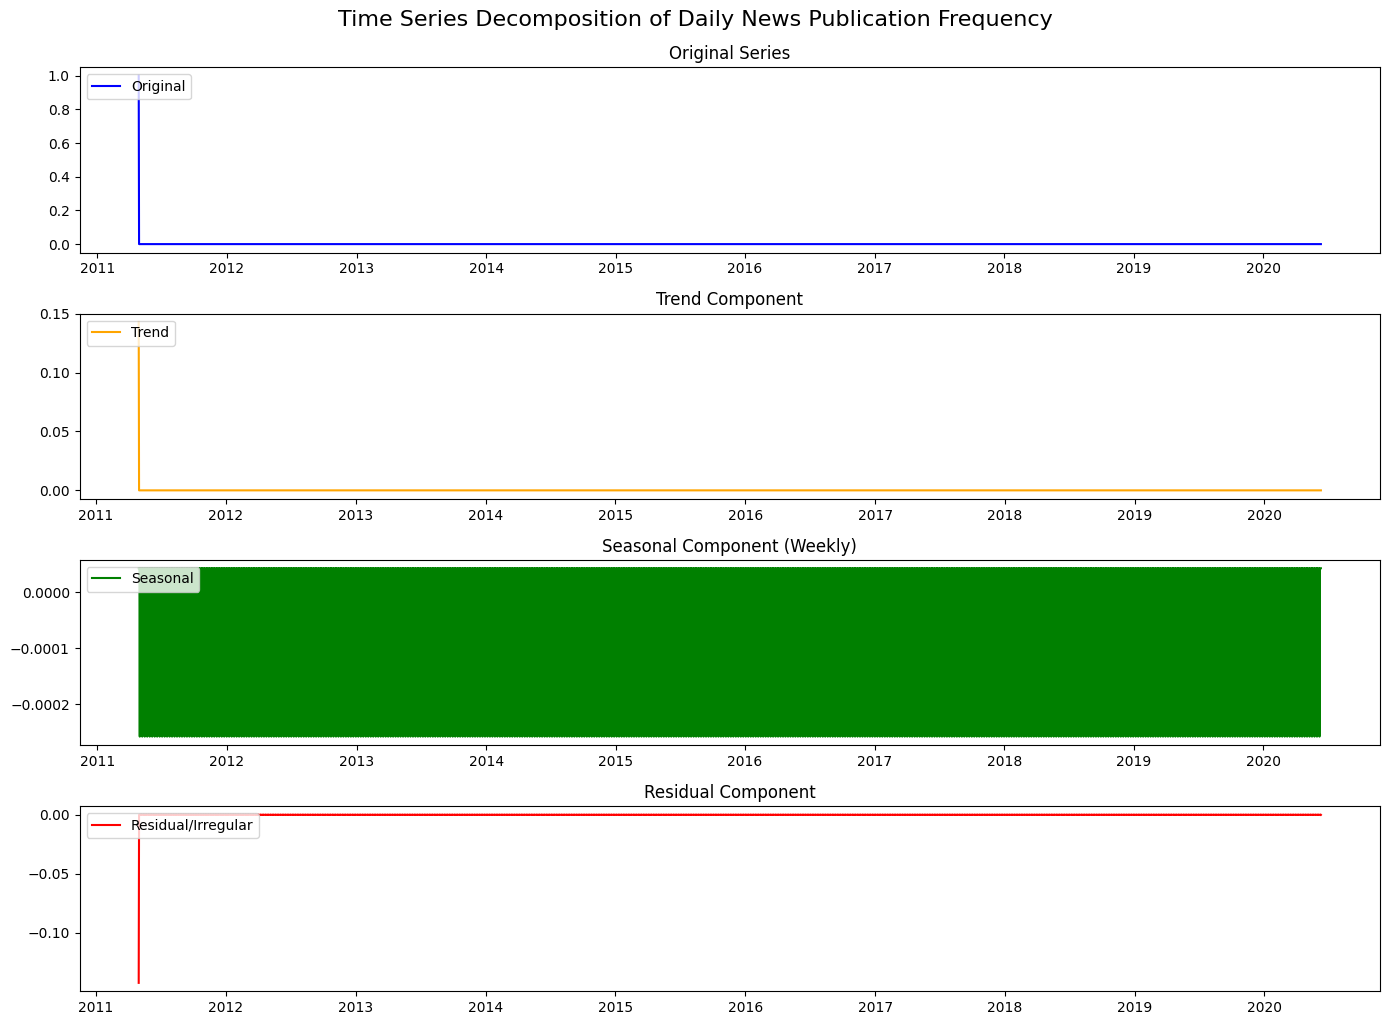


Time series decomposition components plotted.


In [26]:
# Assuming 'time_series_data' DataFrame is already prepared with 'Headlines_Count' column.

# Perform additive decomposition with a 7-day period for weekly seasonality
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=7)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411) # 4 rows, 1 column, 1st plot
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.title('Original Series')
plt.legend(loc='upper left')

plt.subplot(412) # 4 rows, 1 column, 2nd plot
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(413) # 4 rows, 1 column, 3rd plot
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component (Weekly)')
plt.legend(loc='upper left')

plt.subplot(414) # 4 rows, 1 column, 4th plot
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.suptitle('Time Series Decomposition of Daily News Publication Frequency', fontsize=16, y=1.02) # Main title
plt.show()

print("\nTime series decomposition components plotted.")

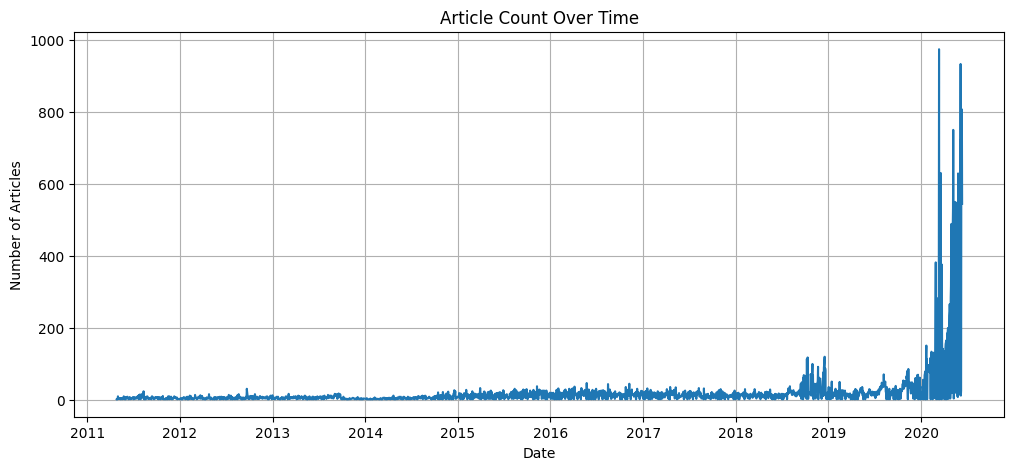

In [27]:
# Article Count over time
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()

plt.figure(figsize=(12, 5))
daily_counts.plot()
plt.title('Article Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


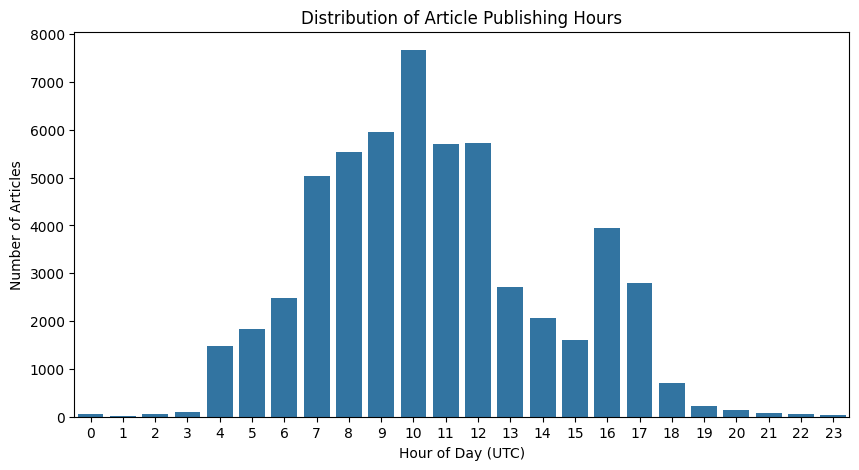

In [28]:
# Publishing Hour Analysis
df['hour'] = df['date'].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title('Distribution of Article Publishing Hours')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.show()

#### Publisher Analysis

In [29]:
# Publisher counts
df['publisher'].value_counts().head(10)

# Domain extraction if email used
df['domain'] = df['publisher'].str.extract(r'@(.+)$')
df['domain'].value_counts().head()


domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64